In [193]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import feather
import geopandas as gpd


colors = {
    'purple': "#5930F2",
    'green': "#16E4CA",
    'black': "#919191"
}

purple_light = sns.light_palette(colors["purple"], 8)
purple_dark = sns.dark_palette(colors["purple"], 8)

green_light = sns.light_palette(colors["green"], 8)
green_dark = sns.dark_palette(colors["green"], 8)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Charge le fichier feather
df = pd.read_feather('data/energy_clean.ftr')
df = df.set_index('date_heure')

sns.set_style = "seaborn-whitegrid"

sns.set(
    rc={
        "font.style": "normal",
        "axes.facecolor": "white",
        "grid.color": ".8",
        "grid.linestyle": "-",
        "figure.facecolor": "white",
        "figure.titlesize": 25,
        "text.color": "black",
        "xtick.color": "black",
        "ytick.color": "black",
        "axes.labelcolor": "black",
        "axes.grid": True,
        "axes.labelsize": 14,
        "xtick.labelsize": 12,
        "font.size": 14,
        "ytick.labelsize": 12,
        "legend.title_fontsize": 12
    }
)

In [194]:
df.head()

,code_insee_region,region,nature,annee,mois,jour,heure,minute,seconde,dayofweek,am,amj,saison,consommation,ech_physiques,thermique,nucleaire,eolien,solaire,hydraulique,bioenergies,pompage_prod,pompage_conso,total_prod
date_heure,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,24,Centre-Val de Loire,Données définitives,2013,1,1,0,0,0,1,2013-01,2013-01-01,1,2319.0,-7365.0,90.0,9022.0,513.0,0.0,34.0,23.0,-0.0,NaN,9659.0
2013-01-01 00:00:00+00:00,32,Hauts-de-France,Données définitives,2013,1,1,0,0,0,1,2013-01,2013-01-01,1,5832.0,-630.0,830.0,4500.0,1062.0,0.0,1.0,68.0,-0.0,NaN,6393.0
2013-01-01 00:00:00+00:00,27,Bourgogne-Franche-Comté,Données définitives,2013,1,1,0,0,0,1,2013-01,2013-01-01,1,2289.0,1827.0,235.0,NaN,105.0,0.0,105.0,13.0,-0.0,0.0,445.0
2013-01-01 00:00:00+00:00,44,Grand Est,Données définitives,2013,1,1,0,0,0,1,2013-01,2013-01-01,1,4811.0,-7097.0,319.0,9010.0,1114.0,0.0,1406.0,55.0,-0.0,0.0,11849.0
2013-01-01 00:00:00+00:00,52,Pays de la Loire,Données définitives,2013,1,1,0,0,0,1,2013-01,2013-01-01,1,3359.0,3063.0,126.0,NaN,138.0,0.0,0.0,29.0,-0.0,NaN,264.0


# Visualisation de la consommation

## Consommation annuelle moyenne par région
La consommation d'énergie n'est pas équilibrée en fonction des régions ce à quoi nous pouvions nous attendre étant donné l'écart démographique et très certainement les différences de production industrielle.

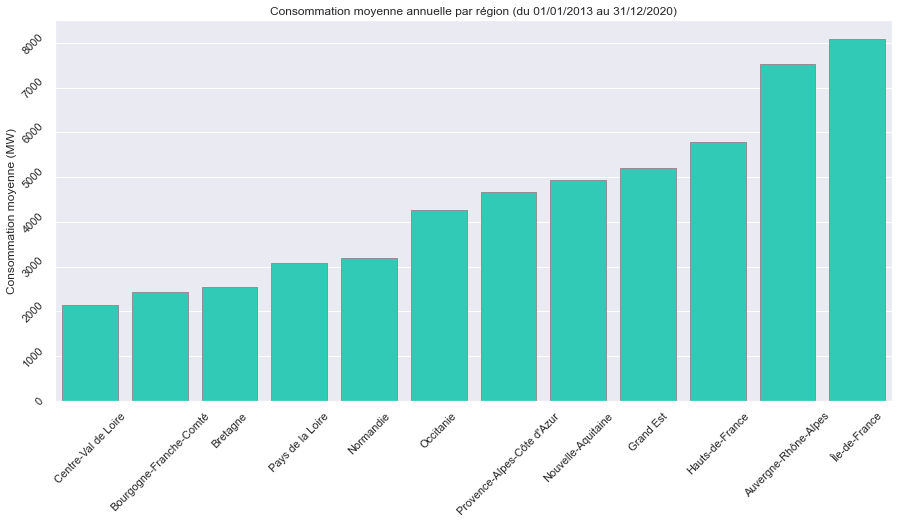

In [195]:
# Groupby de la région et de l'années en fonction de la moyenne de consommation
conso = df.groupby(['region', 'annee'])['consommation'].mean().reset_index()
conso = conso.sort_values(by='consommation', ascending=True)

plt.figure(figsize=(15, 7))
sns.set_theme()

ax = sns.barplot(x='region', y='consommation', data=conso, ci=False, color=colors['green'], edgecolor=colors['black'])

ax.set_ylabel('Consommation moyenne (MW)')
ax.set_xlabel(None)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
plt.setp(ax.get_yticklabels(), rotation=45, horizontalalignment='right', verticalalignment='center')

ax.set_title('Consommation moyenne annuelle par région (du 01/01/2013 au 31/12/2020)')
# Sauvegarde en png et dpi=150
plt.savefig("Outputs/02_-_Consommation_moyenne_en_MW_par_region.png", dpi=150, bbox_inches='tight')
plt.show()

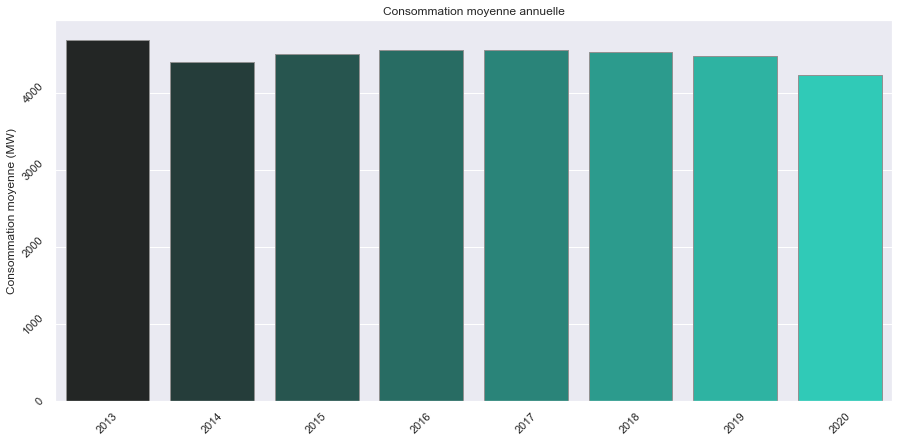

In [196]:
plt.figure(figsize=(15, 7))
sns.set_theme()

ax = sns.barplot(x='annee', y='consommation', data=conso, ci=False, palette=green_dark, edgecolor=colors['black'])

ax.set_ylabel('Consommation moyenne (MW)')
ax.set_xlabel(None)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
plt.setp(ax.get_yticklabels(), rotation=45, horizontalalignment='right', verticalalignment='center')

ax.set_title('Consommation moyenne annuelle')
# Sauvegarde en png et dpi=150
plt.savefig("Outputs/02_-_Consommation_moyenne_en_MW.png", dpi=150, bbox_inches='tight')
plt.show()

In [197]:
conso.head()

,region,annee,consommation
31,Centre-Val de Loire,2020,2066.751025
25,Centre-Val de Loire,2014,2121.932420
26,Centre-Val de Loire,2015,2132.143607
29,Centre-Val de Loire,2018,2143.718151
27,Centre-Val de Loire,2016,2152.933857


## Consommation moyenne par mois
On note une saisonnalité certaine concernant la consommation d'énergie en France, ce qui semble naturellement instinctif.

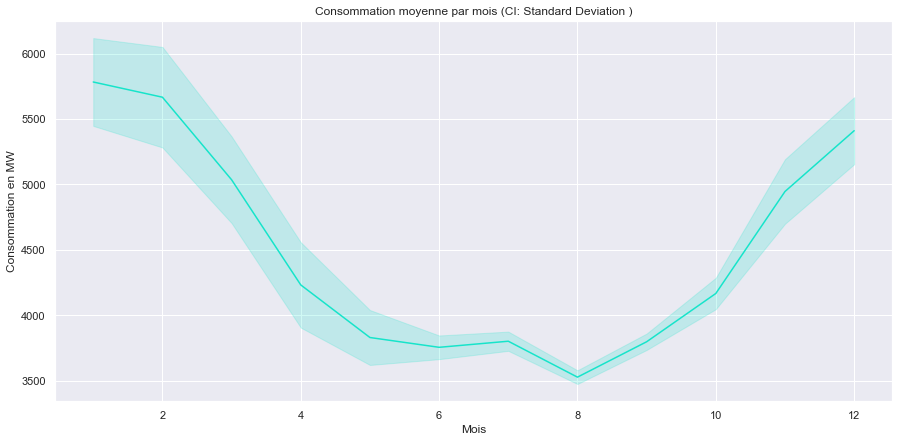

In [198]:
months = df.groupby(['mois', 'annee'])['consommation'].mean().reset_index()

plt.figure(figsize=(15, 7))
ax = sns.lineplot(x='mois', y='consommation', data=months, ci='sd', color=colors['green'])
ax.set_ylabel('Consommation en MW')
ax.set_xlabel('Mois')
ax.set_title('Consommation moyenne par mois (CI: Standard Deviation )')
plt.savefig("Outputs/02_-_Pic_de_consommation_mensuel.png", dpi=150, bbox_inches='tight')
plt.show()

## Consommation moyenne par heure
On note une moyenne de consommation journalière disparate en fonction de l'heure. Cela s'explique facilement avec la prédiode de nuit (22h-4h), le pic autour 10h lorsque l'activité économique bat son plein. 
L'intervalle de conviance s'explique sûrement par la différence de consommation entre les mois de l'année mais aussi par les variations de consommation entre régions.

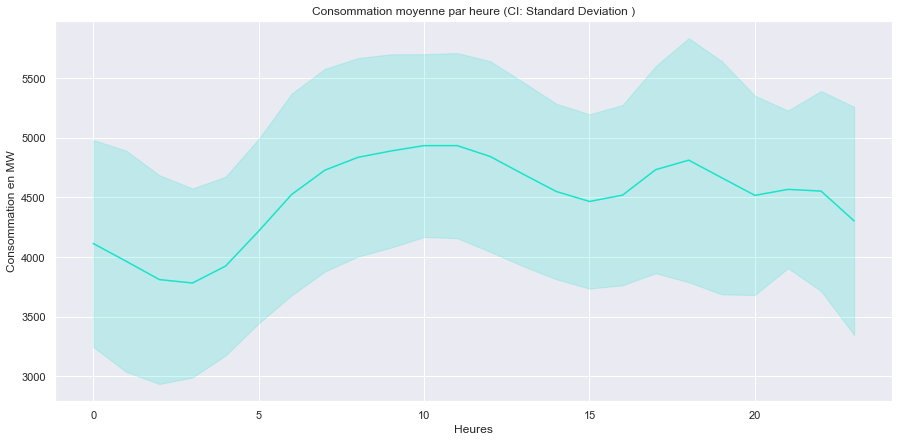

In [199]:
hours = df.groupby(['heure', 'mois'])['consommation'].mean().reset_index()

plt.figure(figsize=(15, 7))
ax = sns.lineplot(x='heure', y='consommation', data=hours, ci='sd', color=colors['green'])
ax.set_ylabel('Consommation en MW')
ax.set_xlabel('Heures')
ax.set_title('Consommation moyenne par heure (CI: Standard Deviation )')
plt.savefig("Outputs/02_-_Pic_de_consommation_quotidien_variations_par_mois.png", dpi=150, bbox_inches='tight')
plt.show()

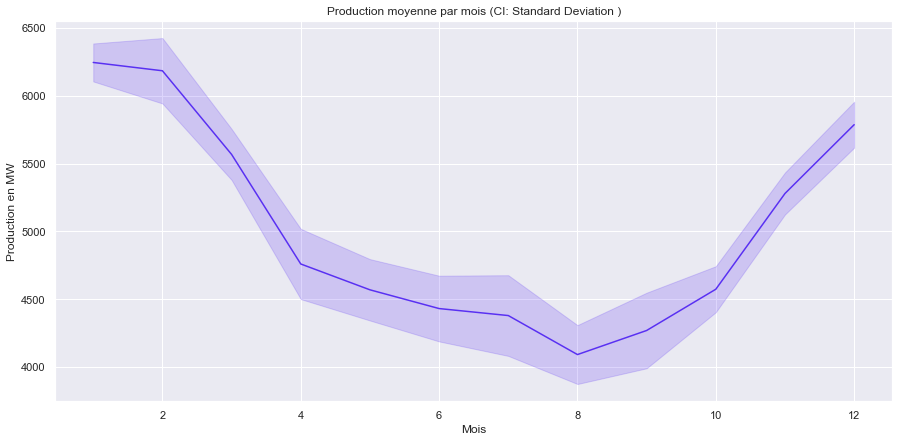

In [200]:
months = df.groupby(['mois', 'annee'])['total_prod'].mean().reset_index()

plt.figure(figsize=(15, 7))
ax = sns.lineplot(x='mois', y='total_prod', data=months, ci='sd', color=colors['purple'])
ax.set_ylabel('Production en MW')
ax.set_xlabel('Mois')
ax.set_title('Production moyenne par mois (CI: Standard Deviation )')
plt.savefig("Outputs/02_-_Pic_de_production_mensuel.png", dpi=150, bbox_inches='tight')
plt.show()

# Visualisation de la production
## Production moyenne par année

La production d'énergie en France semble stable avec une légère tendance à la baisse.

A noter cepandant, une année 2020 visiblement plus basse que ce que l'on pourrait imaginer. Cela est certainement du à la période de confinement du COVID.

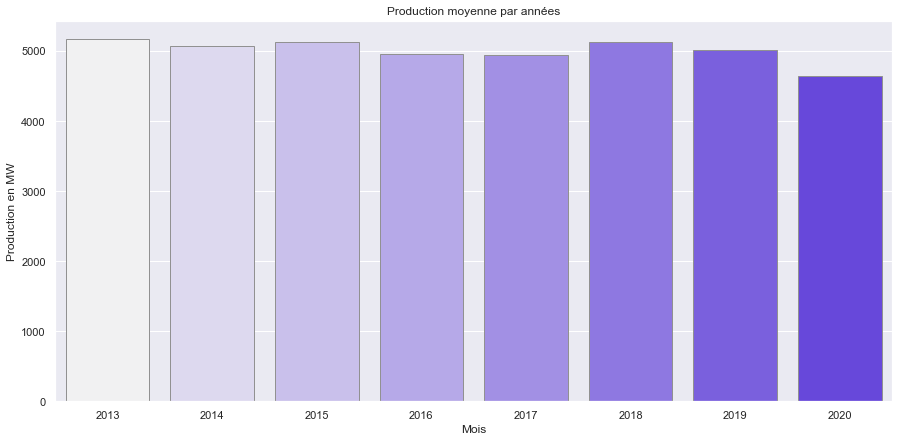

In [201]:
prod = df.groupby(['region', 'annee'])['total_prod'].mean().reset_index()
prod = prod.sort_values(by='total_prod', ascending=False)

plt.figure(figsize=(15, 7))
sns.barplot(x='annee', y='total_prod', data=prod, palette=purple_light, ci=False, edgecolor=colors['black'])
plt.ylabel('Production en MW')
plt.xlabel('Mois')
plt.title('Production moyenne par années')

plt.savefig("Outputs/02_-_Production_annuelle.png", dpi=150, bbox_inches='tight')
plt.show()

## Production moyenne par région
On note une très grande disparité de production d'énergie par région.
Cela nous laisse suggérer que les moyens de production ne sont pas réparti de façon "équitable" sur le territoire français. On peut penser que les caractéristiques géographiques (présence de cours d'eau avec une débit suffisant, exposition solaire/au vent, ...) et démographiques (pression sur le territoire en Ile de France par exemple), ne laissent pas autant de possibilités à certaines régions qu'à d'autres.

<Figure size 1080x504 with 0 Axes>

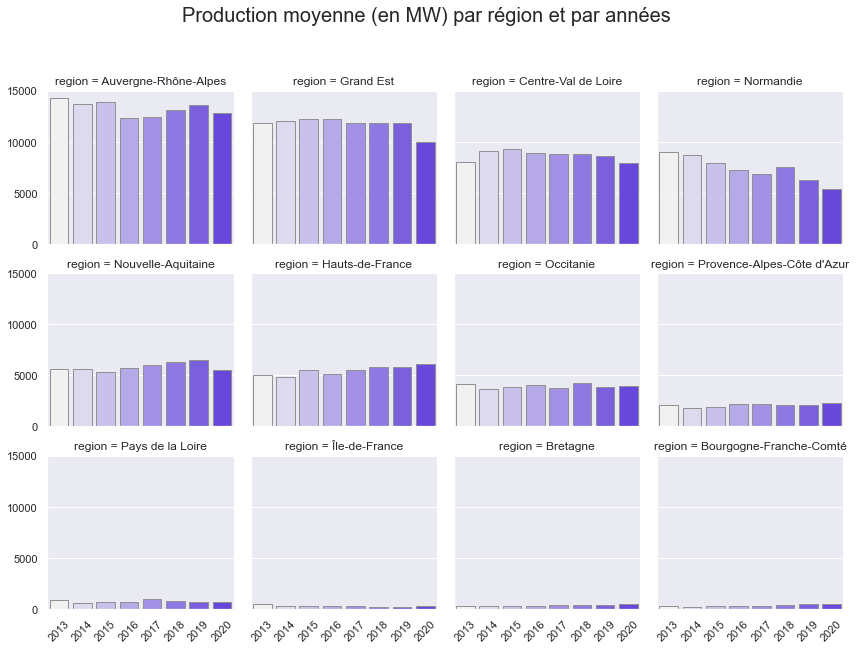

In [202]:
plt.figure(figsize=(15, 7))
g = sns.FacetGrid(prod, col='region', col_wrap=4)
g.map_dataframe(sns.barplot, x="annee", y="total_prod", ci=False, palette=purple_light, edgecolor=colors['black'])
for axes in g.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
g.fig.subplots_adjust(top=.85)
g.fig.suptitle('Production moyenne (en MW) par région et par années', size=20)
plt.savefig("Outputs/02_-_Production_moyenne_en_MW_par_région.png", dpi=150, bbox_inches='tight')
plt.show()
# Très grande disparité de production selon les régions

In [230]:
# Production vs Consommation
prod_conso = df.groupby(pd.Grouper(freq='M'))[['consommation', 'total_prod']].mean()
print(prod_conso.head())

plt.figure(figsize=(15, 7))
sns.lineplot(x=prod_conso.index, y=prod_conso['total_prod'], ci='sd', color=colors['purple'])
sns.lineplot(x=prod_conso.index, y=prod_conso['consommation'], ci='sd', color=colors['green'])
plt.ylabel('Production en MW')
plt.xlabel('Mois')

plt.show()


                           consommation   total_prod
date_heure                                          
2013-01-31 00:00:00+00:00   5969.042115  6394.880012
2013-02-28 00:00:00+00:00   6118.508185  6404.643710
2013-03-31 00:00:00+00:00   5514.379810  5743.849804
2013-04-30 00:00:00+00:00   4642.557581  5052.057321
2013-05-31 00:00:00+00:00   4105.818380  4804.173233


TypeError: list indices must be integers or slices, not str

<Figure size 1080x504 with 0 Axes>

In [203]:
agg_prod = {
    'thermique': ['mean'],
    'nucleaire': ['mean'],
    'eolien': ['mean'],
    'solaire': ['mean'],
    'hydraulique': ['mean'],
    'bioenergies': ['mean'],
    'pompage_prod': ['mean'],
}
production = df.groupby(['annee']).agg(agg_prod).reset_index()
production.columns = ['_'.join(col) for col in production.columns.values]
new_names = {
    'annee_': 'annee',
    'thermique_mean': 'thermique',
    'nucleaire_mean': 'nucleaire',
    'eolien_mean': 'eolien',
    'solaire_mean': 'solaire',
    'hydraulique_mean': 'hydraulique',
    'bioenergies_mean': 'bioenergies',
    'pompage_prod_mean': 'pompage'
}
production.rename(columns=new_names, inplace=True)

X = production.annee.unique().tolist()
# / 1000 pour afficher en Gigawatt
y = [production.nucleaire / 1000, production.thermique / 1000, 
     production.eolien / 1000, production.solaire / 1000, 
     production.hydraulique / 1000, production.bioenergies / 1000, production.pompage / 1000]
labels = ['nucleaire', 'thermique', 'eolien', 'solaire', 'hydraulique', 'bioenergies', 'pompage']
colors = ['#EBC555', '#47371C', '#BFF1F7', '#FFFF8C', '#4F60F5', '#55D769', '#000000']

## Production moyenne par filière
On distingue facilement la prépondérance du *nucléaire* dans le paysage de la production d'énergie Française, comme l'ont pouvait s'y attendre.

L'*hydraulique* est la seconde filière de production et l'on note que celle-ci semble réduire au fil des années, peut-être du aux chutes de pluie et de neige moins fréquentes.

La part de deux énergie renouvelables, l'*éolien* et le *solaire*, sont en expansion sur le territoire français.

On remarquera que la filière *thermique* reste relativement conséquante.

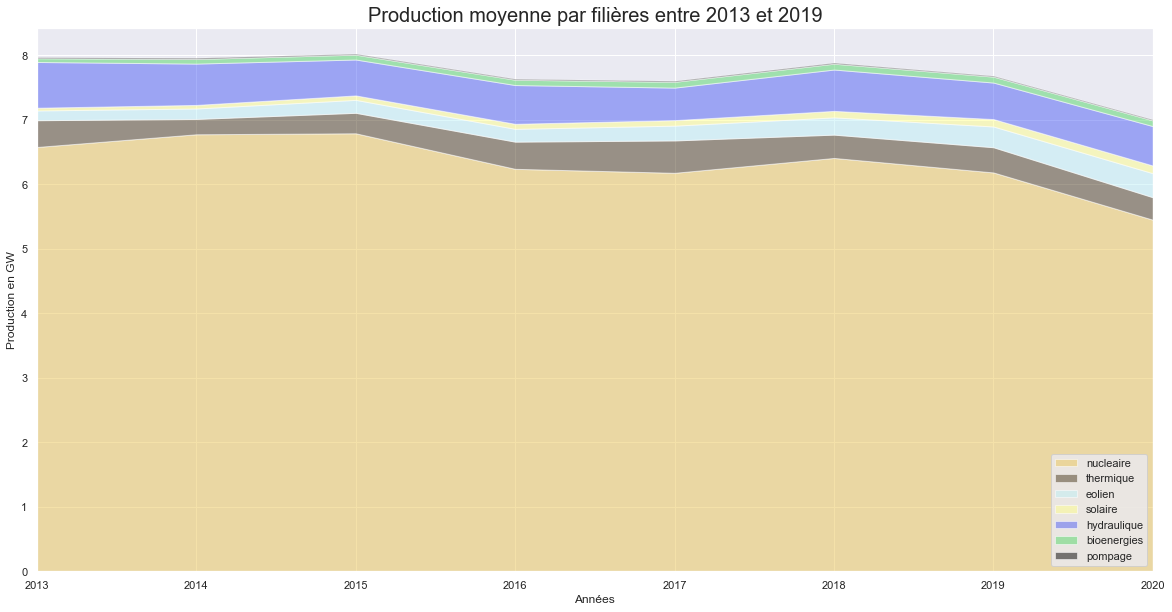

In [204]:

plt.figure(figsize=(20, 10))
plt.stackplot(X,y, labels=labels, colors=colors, alpha=.5)
plt.xlabel('Années')
plt.ylabel('Production en GW')
plt.xlim([min(X), max(X)])
plt.title('Production moyenne par filières entre 2013 et 2019', size='20')
plt.legend(loc='lower right')
plt.savefig("Outputs/02_-_Production_moyenne_en_MW_par_fillières_par_années.png", dpi=150, bbox_inches='tight')
plt.show()

In [205]:
agg_prod = {
    'thermique': ['mean'],
    'nucleaire': ['mean'],
    'eolien': ['mean'],
    'solaire': ['mean'],
    'hydraulique': ['mean'],
    'bioenergies': ['mean'],
    'pompage_prod': ['mean'],
}
prod_month = df.groupby(['mois']).agg(agg_prod).reset_index()
prod_month.columns = ['_'.join(col) for col in prod_month.columns.values]
new_names = {
    'mois_': 'mois',
    'thermique_mean': 'thermique',
    'nucleaire_mean': 'nucleaire',
    'eolien_mean': 'eolien',
    'solaire_mean': 'solaire',
    'hydraulique_mean': 'hydraulique',
    'bioenergies_mean': 'bioenergies',
    'pompage_prod_mean': 'pompage',
}
prod_month.rename(columns=new_names, inplace=True)

In [206]:
X = prod_month.mois.unique().tolist()
y = [prod_month.nucleaire, prod_month.thermique, prod_month.eolien, prod_month.solaire, prod_month.hydraulique, prod_month.bioenergies, prod_month.pompage]
labels = ['nucleaire', 'thermique', 'eolien', 'solaire', 'hydraulique', 'bioenergies', 'pompage']
colors = ['#EBC555', '#47371C', '#BFF1F7', '#FFFF8C', '#4F60F5', '#55D769', '#000000']

## Production moyenne par filières par mois
La production pour les mois d'été est plus basse, comme on pouvait s'y attendre.

On note que c'est le *nucléaire* qui sert principalement de "tampon" lors du phasage saisonnier.

De même, on distingue que l'*éolien* est plus efficasse en hivers et que, inversement, le *solaire* l'est plus en été.

Concernant l'*hydraulique*, les mois d'hivers et de printemps profitent sûrement des précipitations et des premières fontes de neige.

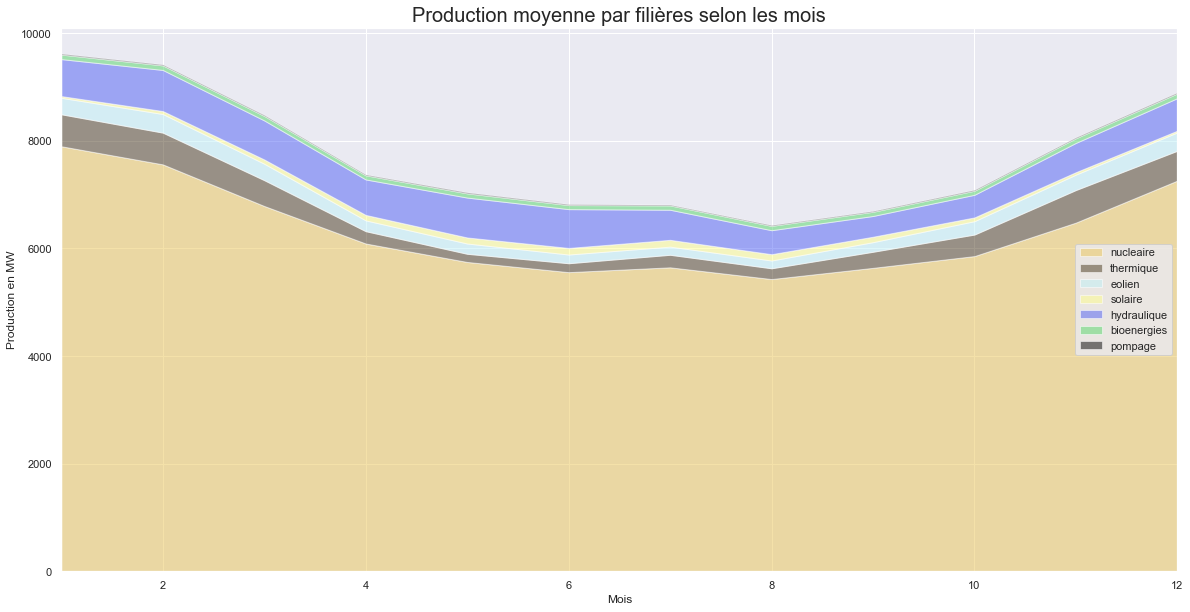

In [207]:
plt.figure(figsize=(20, 10))
plt.stackplot(X,y, labels=labels, colors=colors, alpha=.5)
plt.xlabel('Mois')
plt.ylabel('Production en MW')
plt.xlim([min(X), max(X)])
plt.title('Production moyenne par filières selon les mois', size='20')
plt.legend(loc='right')
plt.savefig("Outputs/02_-_Production_moyenne_en_MW_par_fillières_par_mois.png", dpi=150, bbox_inches='tight')
plt.show()

# Geopandas

J'ai voulu m'essayer à Geopandas afin de visualiser les disparités de production en France.

## Carte de répartition de la production en France en 2019

Comme l'indiquaient les graphiques précédants, on remarque effectivement une forte disparité de production entre les régions.

In [208]:
df = df[ df.annee == 2019 ]
df['prod'] = round(df['total_prod'] / 1000000, 4) # TeraWatt
df['solaire'] = round(df['solaire'] / 1000000, 4) # TeraWatt
df['eolien'] = round(df['eolien'] / 1000000, 4) # TeraWatt
df['bioenergies'] = round(df['bioenergies'] / 1000000, 4) # TeraWatt
df['hydraulique'] = round(df['hydraulique'] / 1000000, 4) # TeraWatt

df['renouvelable'] = df['solaire'] + df['eolien'] + df['bioenergies'] + df['hydraulique']
#df['renouvelable'] = round(df['renouvelable'] / 1000000, 4) # TeraWatt

df = df.groupby(['region', 'code_insee_region'])[['prod', 'renouvelable', 'solaire', 'eolien', 'bioenergies', 'hydraulique']].sum().reset_index()

france = gpd.read_file('data/shapes/regions-20170102.shp')

df.code_insee_region = df.code_insee_region.astype(int)
france.insee = france.insee.astype(int)

new_df = df.merge(right=france,
                  left_on=['code_insee_region'],
                  right_on=['insee'])

new_df = gpd.GeoDataFrame(new_df)

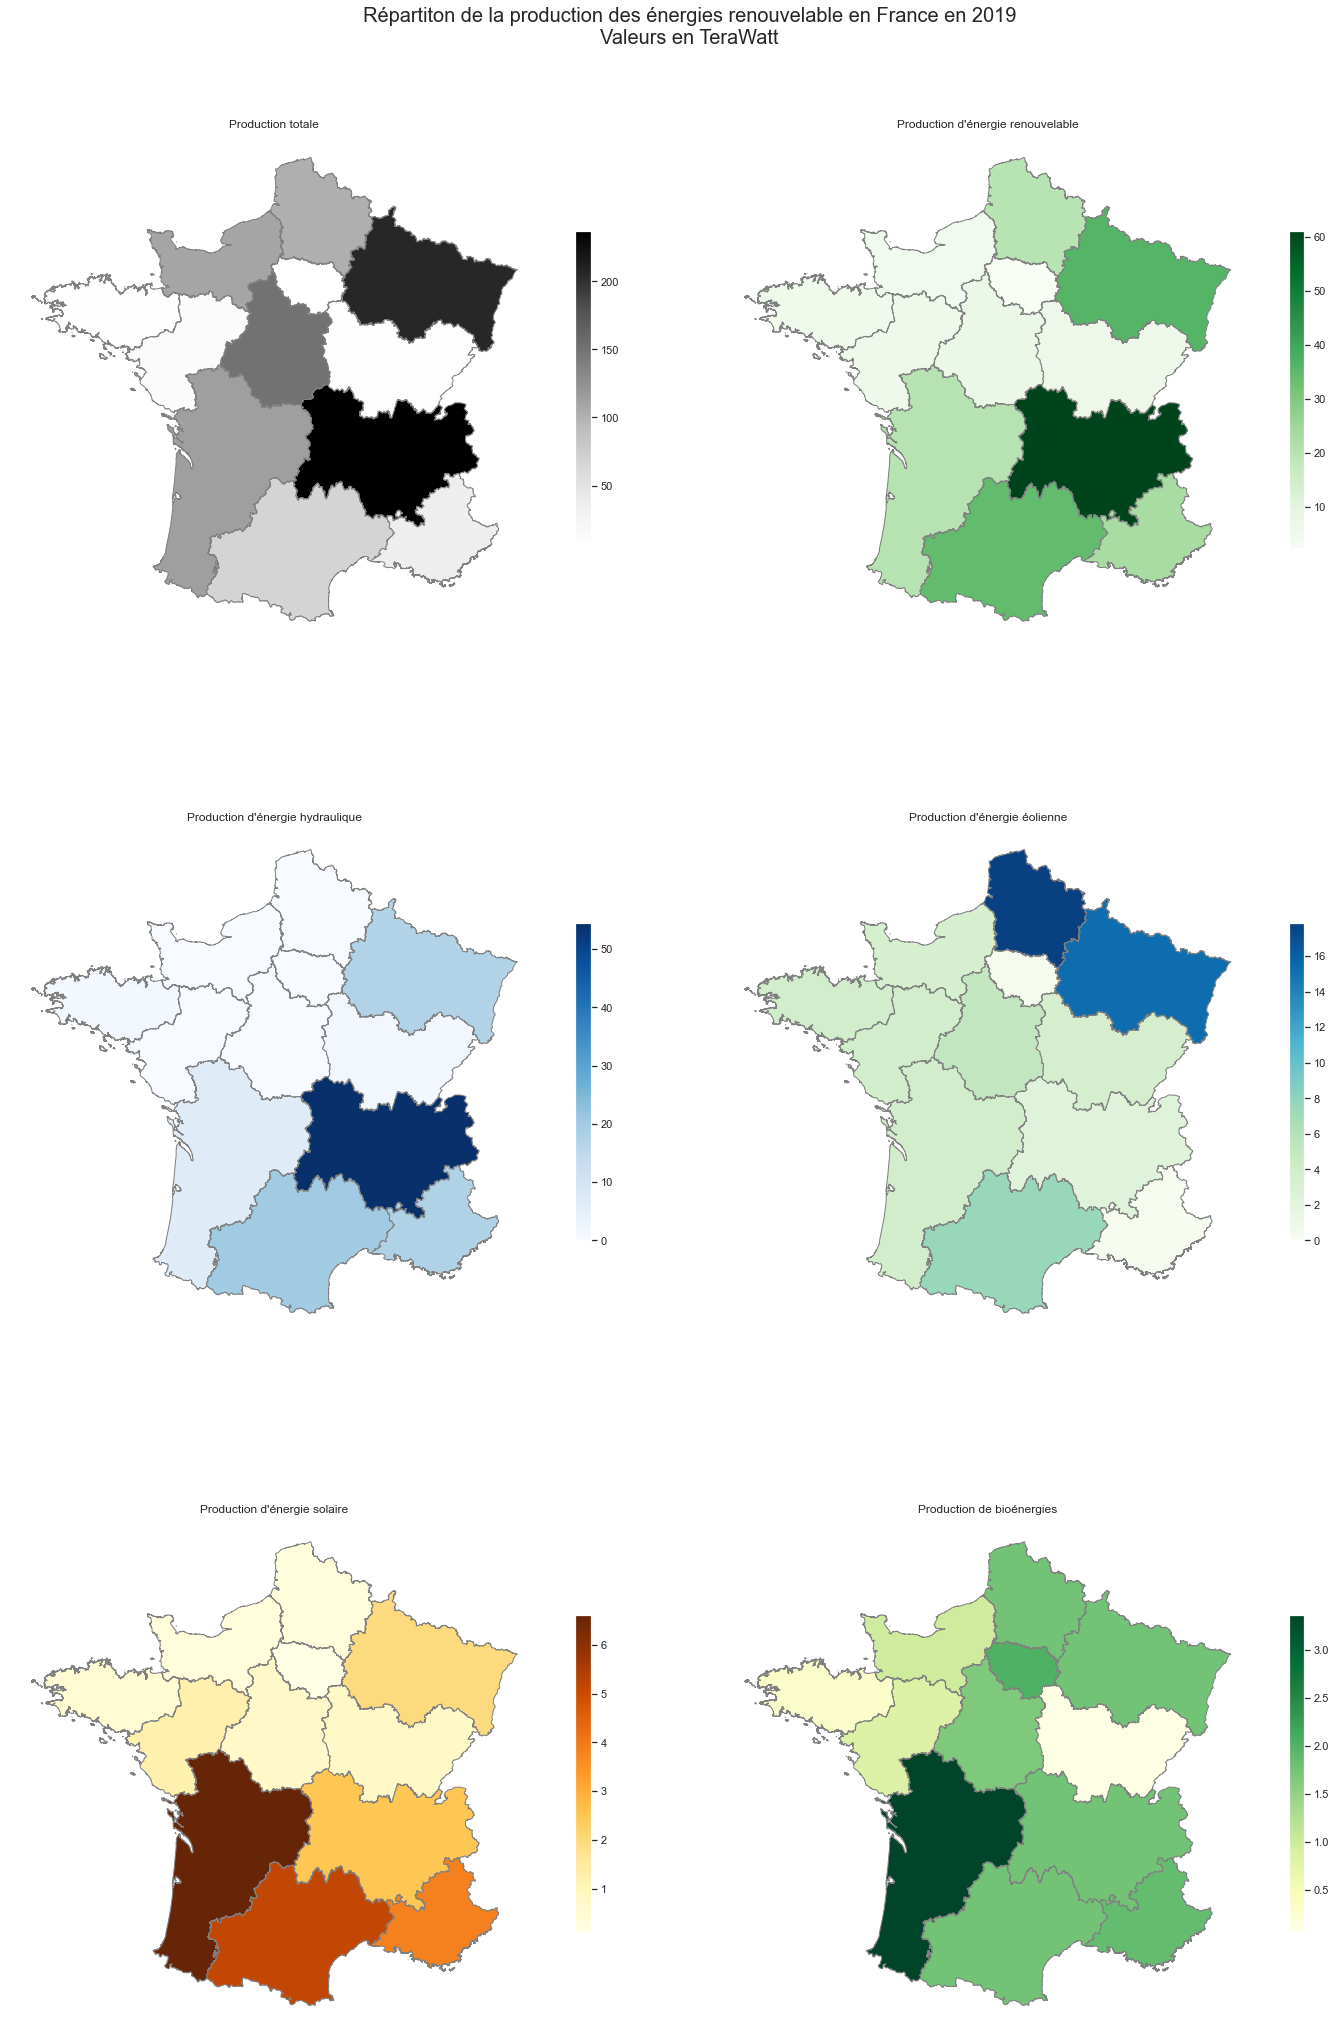

In [209]:
fig, ax = plt.subplots(3, 2, figsize=(20, 30))
fig.tight_layout(h_pad=3)

fig.suptitle("Répartiton de la production des énergies renouvelable en France en 2019\nValeurs en TeraWatt", fontsize=20)
fig.subplots_adjust(top=.95)

new_df.plot('prod', edgecolor='grey', legend=True, cmap='Greys', legend_kwds={'shrink': 0.5}, ax=ax[0,0])
ax[0,0].set_title('Production totale', size=12)
ax[0,0].axis('off')

new_df.plot('renouvelable', edgecolor='grey', legend=True, cmap='Greens', legend_kwds={'shrink': 0.5}, ax=ax[0,1])
ax[0,1].set_title("Production d'énergie renouvelable", size=12)
ax[0,1].axis('off')

new_df.plot('hydraulique', edgecolor='grey', legend=True, cmap='Blues', legend_kwds={'shrink': 0.5}, ax=ax[1,0])
ax[1,0].set_title("Production d'énergie hydraulique", size=12)
ax[1,0].axis('off')

new_df.plot('eolien', edgecolor='grey', legend=True, cmap='GnBu', legend_kwds={'shrink': 0.5}, ax=ax[1,1])
ax[1,1].set_title("Production d'énergie éolienne", size=12)
ax[1,1].axis('off')

new_df.plot('solaire', edgecolor='grey', legend=True, cmap='YlOrBr', legend_kwds={'shrink': 0.5}, ax=ax[2,0])
ax[2,0].set_title("Production d'énergie solaire", size=12)
ax[2,0].axis('off')

new_df.plot('bioenergies', edgecolor='grey', legend=True, cmap='YlGn', legend_kwds={'shrink': 0.5}, ax=ax[2,1])
ax[2,1].set_title("Production de bioénergies", size=12)
ax[2,1].axis('off')

plt.savefig("Outputs/02_-_Geopandas_repartition_des_energies_renouvelables.png", dpi=150, bbox_inches='tight')

plt.show()

In [210]:
ren_2019 = new_df['renouvelable'].sum()

eolien = new_df['eolien'].sum()
solaire = new_df['solaire'].sum()
hydraulique = new_df['hydraulique'].sum()
bioenergies = new_df['bioenergies'].sum()

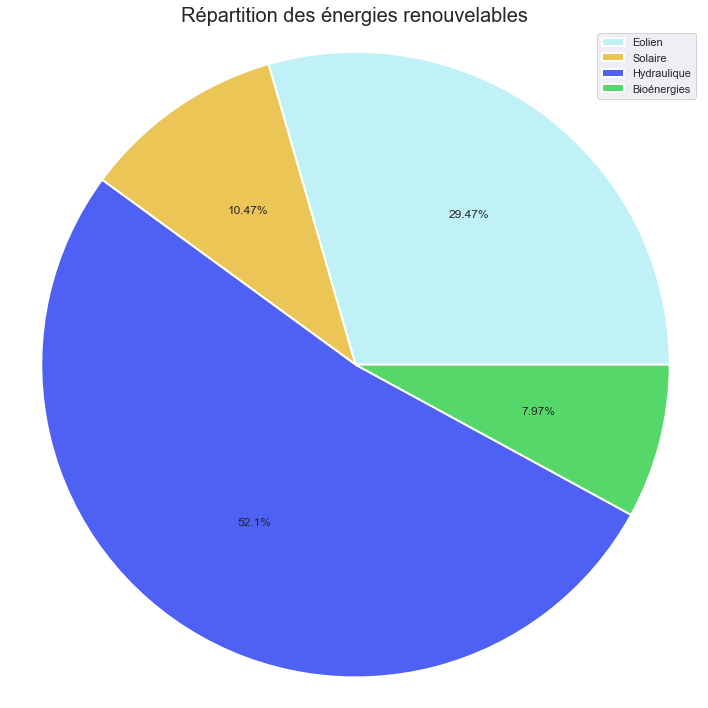

In [211]:
X = [eolien , solaire, hydraulique, bioenergies]
pieColors = ['#BFF1F7', '#EBC555', '#4F60F5', '#55D769']
pieLabels = ['Eolien', 'Solaire', 'Hydraulique', 'Bioénergies']
plt.figure( figsize=(10, 10))
x = [1, 2, 3, 4, 10]
plt.pie(X,
        labels=None, 
        colors=pieColors,
        autopct = lambda x: str(round(x, 2)) + '%',
        wedgeprops = {
            'antialiased': True,
            "edgecolor" : "w",
            'linewidth': 2
        },
       )
plt.axis('equal')  
plt.legend( loc="best", labels=pieLabels)
plt.title('Répartition des énergies renouvelables', size=20)
plt.tight_layout()
plt.savefig("Outputs/02_-_Repartition_des_energies_renouvelables.png", dpi=150, bbox_inches='tight')
plt.show()


In [212]:
df = pd.read_feather('data/energy_clean.ftr')
df = df.set_index('date_heure')